In [53]:
import numpy as np
import matplotlib.pyplot as plt

### Generate clusters

In [54]:
x_dim = 2; num_clusters = 5; samples = 10**4

In [55]:
mu = []

for i in range(num_clusters):
    centroid = 10*np.random.randn(x_dim,1)
    print(f'Cluster {i+1} centroid: {centroid}')
    mu.append(centroid)

Cluster 1 centroid: [[10.386401  ]
 [ 2.70350894]]
Cluster 2 centroid: [[-0.19188103]
 [ 4.10793767]]
Cluster 3 centroid: [[-4.61400862]
 [ 0.48346749]]
Cluster 4 centroid: [[-1.28399746]
 [ 8.98336153]]
Cluster 5 centroid: [[ -0.41780454]
 [-10.63419091]]


In [56]:
cluster = []

for i in range(num_clusters):
    cluster.append(mu[i] + np.random.randn(x_dim,samples))

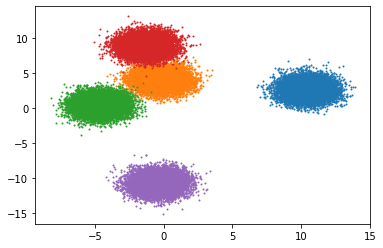

In [57]:
for i in range(num_clusters):
    plt.scatter(cluster[i][0],cluster[i][1],s=1)

plt.show()

In [58]:
X = np.concatenate(cluster, axis=1) # concatenate clusters

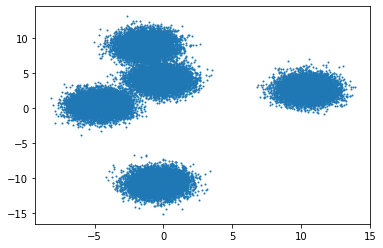

In [59]:
plt.scatter(X[0],X[1],s=1)
plt.show()

### Online algorithm

In [60]:
W = np.random.randn(num_clusters,x_dim)
theta = np.zeros((num_clusters,1))
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,num_clusters*samples))

idx = np.random.permutation(num_clusters*samples)

for epoch in range(5):
    
    print(f'Epoch {epoch+1}')

    for t in range(num_clusters*samples):

        x = X[:,idx[t]].reshape((2,1))

        a = -W@x + theta

        c = np.argmin(a)
        y = np.zeros((num_clusters,1)); y[c] = 1
        z = -a[c]

        n += y

        for i in range(num_clusters):
            for j in range(x_dim):
                W[i,j] += y[i]*(2*x[j] - W[i,j])/min(n[i],100)

            theta[i] += y[i]*(z - theta[i])/min(n[i],100)

    for j in range(num_clusters):
        Y[j,idx[t]] = y[j]

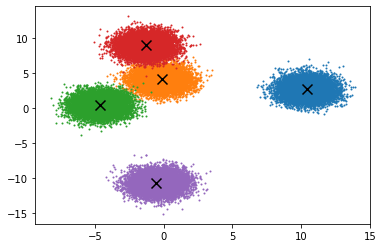

In [61]:
for i in range(num_clusters):
    plt.scatter(cluster[i][0],cluster[i][1],s=1)

for i in range(num_clusters):
    plt.scatter(W[i,0]/2,W[i,1]/2,marker='x',color='black',s=100)

plt.show()